In [18]:
import pyathena as pa
import pandas as pd
import numpy as np
from pyathena import connect
import matplotlib.pyplot as plt

In [2]:
# create connection to athena
conn = connect(s3_staging_dir='s3://aws-athena-query-results-037105129183-eu-west-1/',
               region_name='eu-west-1')

In [3]:
# ml-row
ml_df=pd.DataFrame()
query = """SELECT *
       FROM
         ((((dm_ceres_ml_datalake.row_ceres
       INNER JOIN dm_ceres_ml_datalake.adslot_ceres am ON (ref_adslot_id = am.primary_adslot_id))
       INNER JOIN dm_ceres_ml_datalake.booking_ceres bm ON (ref_booking_id = bm.primary_booking_id))
       INNER JOIN dm_ceres_ml_datalake.referrer_ceres rm ON (ref_referrer_id = rm.primary_referrer_id))
       INNER JOIN dm_ceres_ml_datalake.variant_ceres vm ON (ref_variant_id = vm.primary_variant_id))"""

#         df= pd.read_sql(query,conn)
ml_df = ml_df.append(pd.read_sql(query,conn))

In [8]:
ml_df.shape

(816163, 28)

In [9]:
# ml-row
ceres_df=pd.DataFrame()
query = """SELECT *
       FROM
         ceres_datalake.joined_ceres"""

#         df= pd.read_sql(query,conn)
ceres_df = ceres_df.append(pd.read_sql(query,conn))

In [10]:
ceres_df.shape

(816163, 28)

In [40]:
def showColumnHistograms(ml_df, ceres_df, column='cat_adslot_topic_id',
                         bin_resolution=1.0):
    plt.rcParams['figure.figsize'] = [12, 8]
    
    df = pd.DataFrame()
    df['ml'] = ml_df[column]
    df['ceres'] = ceres_df[column]
    
    bin_value = df['ml'].nunique() if df['ml'].nunique() > df['ceres'].nunique() else df['ceres'].nunique()
    
    ax = df.plot.hist(bins = bin_value, alpha=0.5, xlabel = column, ylabel = "Count")
    ax
    

In [12]:
ceres_df.columns

Index(['ref_adslot_id', 'ref_booking_id', 'ref_referrer_id', 'ref_variant_id',
       'label', 'primary_adslot_id', 'cat_adslot_topic_id',
       'cat_adslot_category_id', 'cat_adslot_type_id',
       'cat_adslot_main_title_id', 'cat_domain_id', 'cat_publisher_id',
       'cat_adslot_insights_category_str', 'cat_adslot_insights_topic_str',
       'cat_domain_insights_category_str', 'primary_booking_id',
       'cat_booking_type_id', 'cat_booking_goal_type_id', 'cat_campaign_id',
       'cat_advertiser_id', 'cat_campaign_type_id',
       'cat_campaign_goal_type_id', 'primary_referrer_id',
       'num_context_textfeatures', 'cat_referrer_domain_id',
       'primary_variant_id', 'num_playout_fb_textfeatures',
       'num_playout_imgfeatures'],
      dtype='object')

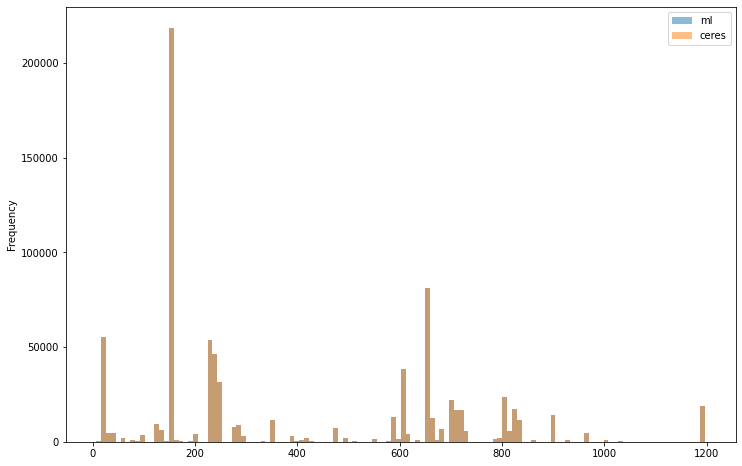

In [51]:
showColumnHistograms(ml_df=ml_df, ceres_df=ceres_df, column='cat_referrer_domain_id')